In [1]:
import numpy as np
import argparse
import time
import os
import functools

import torch
from config.config import get_arguments
from utils.functions import *
from utils.loader import *
from utils.runner import *

from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt

/home/dima/torch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
opt = argparse.Namespace(dir_path='imgs/',
                         #img_path='dataset/glas/glas_11.png',
                        not_cuda = 0,
                        manualSeed=3473,
                        #is_mask=True,
                        gpu=0,
                        min_size=25,
                        max_size=256,
                        scale_factor=0.75,
                        img_shape=(256, 256),
                        num_data=16,
                        batch_size=4,
                        losses = ['ssim11','mse'],         #['ssim11'], ['ssim11','mse'],
                        scale_num=1,
                        beta1=0.5,
                        beta2=0.999,
                        niter=500,
                        d_niter=100,
                        pixel_shuffle_p=0.005,
                        nc_im=3,
                        nfc=128,
                        nfg=64,
                        z_dim=100,
                        lr=1e-4
                        )
opt = post_config(opt)

In [3]:
dir2save = generate_dir2save(opt)
runner = Runner(PathologyLoader, dir2save, opt)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/dima/torch/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


In [5]:
runner.train_d()

100%|█████████████████████████████████| 100/100 [00:05<00:00, 16.71it/s, loss=0.0000]


In [6]:
runner.train_self()

100%|█| 500/500 [00:38<00:00, 13.06it/s, TOT:1.3937, CE:1.9117, SSIM:0.8858, MSE:0.50


In [17]:
runner.train()

100%|█| 500/500 [00:50<00:00,  9.95it/s, total_loss:0.1286, ce_loss:10.6182,         


In [18]:
trained_net = runner.net_list
trained_d = runner.d_net

In [19]:
train_loader_iter = runner.train_loader_iter

In [20]:
x, l = next(train_loader_iter)

In [29]:
sour_idx = 1
tar_idx = 1

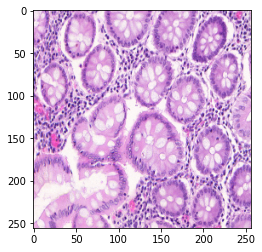

In [30]:
plt.imshow(convert_image_np(x[sour_idx]))

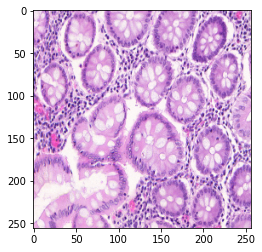

In [31]:
plt.imshow(convert_image_np(x[tar_idx]))

In [32]:
infer = trained_net(x[sour_idx:sour_idx+1].cuda(), torch.eye(4)[tar_idx].cuda())
print(tar_idx, torch.argmax(trained_d(infer)).item())

1 1


In [33]:
rec = trained_net(infer, torch.eye(4)[sour_idx].cuda())
print(sour_idx, torch.argmax(trained_d(rec)).item())

1 1


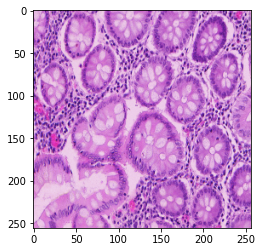

In [34]:
plt.imshow(convert_image_np(infer[0].detach()))

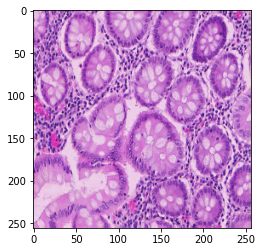

In [35]:
plt.imshow(convert_image_np(rec[0].detach()))

In [28]:
convert_image_np(infer[0].detach())

array([[[0.72725105, 0.49844098, 0.73924613],
        [0.89287114, 0.67484224, 0.8588369 ],
        [0.8858608 , 0.7267904 , 0.8600438 ],
        ...,
        [0.88177747, 0.6776365 , 0.82313174],
        [0.6723304 , 0.41679978, 0.72168326],
        [0.85426915, 0.6351414 , 0.790005  ]],

       [[0.77980024, 0.54489565, 0.7707535 ],
        [0.91764474, 0.7170262 , 0.8982409 ],
        [0.9156973 , 0.761433  , 0.8949127 ],
        ...,
        [0.90954196, 0.75070727, 0.87017494],
        [0.6976331 , 0.43023634, 0.7365018 ],
        [0.8852613 , 0.67776805, 0.82795936]],

       [[0.780619  , 0.52628946, 0.78810084],
        [0.9204875 , 0.7262181 , 0.89995277],
        [0.86820734, 0.7155888 , 0.85301864],
        ...,
        [0.8633618 , 0.6535664 , 0.8519279 ],
        [0.6741645 , 0.40436578, 0.7874198 ],
        [0.8845811 , 0.6120895 , 0.8694353 ]],

       ...,

       [[0.8625977 , 0.54454625, 0.8430712 ],
        [0.8458836 , 0.5152847 , 0.83122545],
        [0.86632264, 0

In [44]:
trained_d(infer)

tensor([[8.0100, 3.5971, 8.7610, 9.0502]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

In [17]:
trained_d(rec)

tensor([[1.1258, 2.6227, 7.5495, 2.6084]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

In [21]:
import torch.nn as nn

In [47]:
ce = nn.CrossEntropyLoss()

In [73]:
x = torch.eye(4)[0]
l = torch.tensor([[18.8399,  4.6291,  6.6840, 13.8463]])
k = torch.tensor(0)
# tensor(0, device='cuda:0')
xxx = torch.eye(4)[[k.unsqueeze(0)]]

In [74]:
x, l, k, xx, xxx

(tensor([1., 0., 0., 0.]),
 tensor([[18.8399,  4.6291,  6.6840, 13.8463]]),
 tensor(0),
 tensor([[1., 0., 0., 0.]]),
 tensor([[1., 0., 0., 0.]]))

In [75]:
ce(l ,xxx)

tensor(0.0068)

In [33]:
trained_d(rec).shape

torch.Size([1, 4])

In [29]:
x.shape

torch.Size([1, 4])

In [32]:
ce(trained_d(rec),x.cuda())

tensor(10.4372, device='cuda:0', grad_fn=<DivBackward1>)

In [9]:
x

tensor([1., 0., 0., 0.])

In [21]:
arr = torch.randn([1,3,10,11])

In [34]:
def convert_image_np(inp):
    # if len(inp.shape) == 4:
    if inp.shape[1]==3:
        inp = denorm(inp)
        inp = move_to_cpu(inp[:,:,:,:])
        
        inp = inp.numpy().transpose((0,2,3,1))
        print(inp.shape)
    else:
        inp = denorm(inp)
        inp = move_to_cpu(inp[:,-1,:,:])
        inp = inp.numpy().transpose((0,1))
    # else:
    #     if inp.shape[0]==3:
    #         inp = denorm(inp)
    #         inp = move_to_cpu(inp[:,:,:])
    #         inp = inp.numpy().transpose((1,2,0))
    #     else:
    #         inp = denorm(inp)
    #         inp = move_to_cpu(inp[-1,:,:])
    #         inp = inp.numpy().transpose((0,1))

    inp = np.clip(inp,0,1)
    return inp

(1, 10, 11, 3)


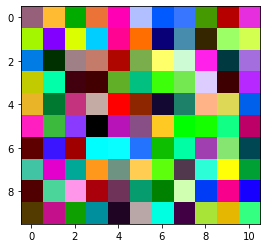

In [36]:
plt.imshow(convert_image_np(arr)[0])